<a href="https://colab.research.google.com/github/SnehaDharne/LearningAnalytics/blob/main/OULADDatasetPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
path='/content/drive/MyDrive/dataset for notebooks/dataset_for_project.csv'

In [ ]:
import pandas as pd
import numpy as np
import sklearn
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; 

In [ ]:
pd.set_option('display.max_columns', None)
df = pd.read_csv(path)

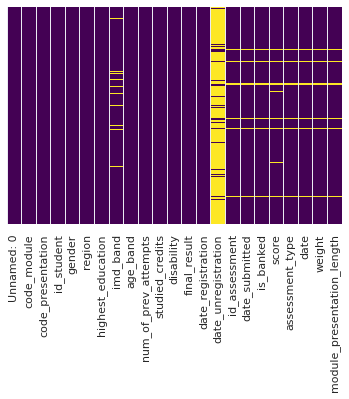

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
df.loc[(df['date_submitted'].isnull())&(df['score'].notnull())]

,Unnamed: 0,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration,id_assessment,date_submitted,is_banked,score,assessment_type,date,weight,module_presentation_length


In [ ]:
df.dropna(subset=['date_submitted'], inplace =True)

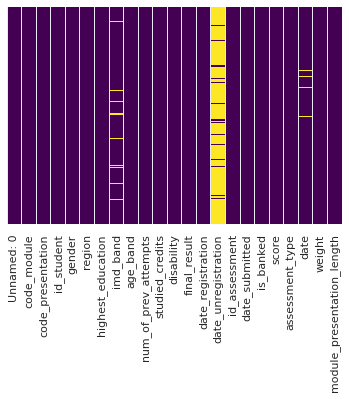

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
#median unregistration number of days for missing values
date= df.date_unregistration.median(skipna=True)

In [ ]:

f=(df.final_result=='Fail')&(df.date_unregistration.isna())
p=(df.final_result=='Pass')&(df.date_unregistration.isna())
d=(df.final_result=='Distinction')&(df.date_unregistration.isna())
w=(df.final_result=='Withdrawn')&(df.date_unregistration.isna())

In [ ]:
#arbitrary constant where unregistration date is not required
df.loc[f,'date_unregistration']=df.loc[f,'date_unregistration'].replace('nan',np.nan).fillna(value= 1000)
df.loc[p,'date_unregistration']=df.loc[p,'date_unregistration'].replace('NaN',np.nan).fillna(value= 1000)
df.loc[d,'date_unregistration']=df.loc[d,'date_unregistration'].replace('nan',np.nan).fillna(value= 1000)
df.loc[w,'date_unregistration']=df.loc[w,'date_unregistration'].replace('nan',np.nan).fillna(value= date)

In [ ]:
df['imd_band'].fillna('?',inplace=True)

In [ ]:
df.date.unique()

array([ 19.,  54., 117., 166., 215.,  47.,  89., 124., 159., 187.,  96.,
       131., 208.,  40.,  12.,  82., 152., 194., 110., 201.,  18.,  67.,
        32., 102., 151., 200., 137., 207.,  nan, 109., 158., 144., 214.,
        25.,  23.,  53.,  81., 116.,  51.,  79., 114., 149., 170., 240.,
       206.,  88., 123., 165., 261.,  74., 241.,  20.,  41.,  62., 111.,
       146., 195.,  33.,  68., 222., 173., 236.,  24.,  52.,  87., 129.,
       171., 227.,  94., 136., 199.,  61., 229.])

In [ ]:
mode_days=df.date.mode()
mode_days

0    222.0
dtype: float64

In [ ]:
df.date.fillna(value=222, inplace=True)

In [ ]:
median_scores=df.score.median(skipna=True)
median_scores

80.0

In [ ]:
df.score.fillna(value=80, inplace=True)

In [ ]:
df.date_registration.median(skipna=True)

-53.0

In [ ]:
df.date_registration.fillna(value=-53, inplace=True)

In [ ]:
df.isnull().sum()

Unnamed: 0                    0
code_module                   0
code_presentation             0
id_student                    0
gender                        0
region                        0
highest_education             0
imd_band                      0
age_band                      0
num_of_prev_attempts          0
studied_credits               0
disability                    0
final_result                  0
date_registration             0
date_unregistration           0
id_assessment                 0
date_submitted                0
is_banked                     0
score                         0
assessment_type               0
date                          0
weight                        0
module_presentation_length    0
dtype: int64

In [ ]:
df.to_csv('final_data_for_LA.csv')

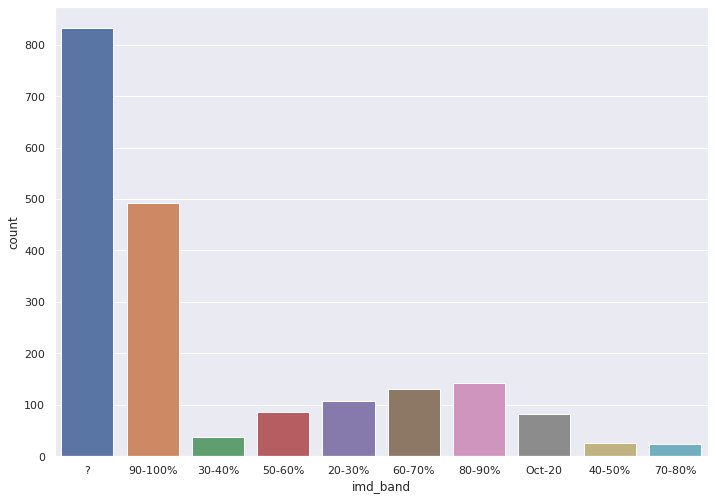

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='imd_band',data=df.loc[df['highest_education']=='Post Graduate Qualification	'])